In [1]:
import numpy as np
import networkx as nx

def cal_all_pairs_minimax_path_matrix_by_algo_4(distance_matrix):
    N = len(distance_matrix)
    all_pairs_minimax_matrix = np.zeros((N, N))

    # Construct Minimum Spanning Tree (MST) from the graph
    MST = construct_MST_from_graph(distance_matrix)
    MST_edge_list = list(MST.edges(data='weight'))

    edge_node_list = [(edge[0], edge[1]) for edge in MST_edge_list]
    edge_weight_list = [edge[2] for edge in MST_edge_list]

    # Sort edges in descending order of weight
    edge_large_to_small_arg = np.argsort(edge_weight_list)[::-1]
    edge_weight_large_to_small = np.array(edge_weight_list)[edge_large_to_small_arg]
    edge_nodes_large_to_small = [edge_node_list[i] for i in edge_large_to_small_arg]

    # Iteratively remove edges and calculate tree nodes
    for i, edge_nodes in enumerate(edge_nodes_large_to_small):
        edge_weight = edge_weight_large_to_small[i]
        MST.remove_edge(*edge_nodes)

        tree1_nodes = list(nx.dfs_preorder_nodes(MST, source=edge_nodes[0]))
        tree2_nodes = list(nx.dfs_preorder_nodes(MST, source=edge_nodes[1]))

        for p1 in tree1_nodes:
            for p2 in tree2_nodes:
                all_pairs_minimax_matrix[p1, p2] = edge_weight
                all_pairs_minimax_matrix[p2, p1] = edge_weight

    # print(all_pairs_minimax_matrix)
    
    return all_pairs_minimax_matrix

def construct_MST_from_graph(distance_matrix):
    G = nx.Graph()
    N = len(distance_matrix)
    for i in range(N):
        for j in range(i + 1, N):
            G.add_edge(i, j, weight=distance_matrix[i][j])
    MST = nx.minimum_spanning_tree(G)
    return MST


In [2]:
def variant_of_Floyd_Warshall(adj_matrix):
    p = adj_matrix.copy()
    N = len(adj_matrix)

    for i in range(N):
        for j in range(N):
            if i != j:
                for k in range(N):
                    if i != k and j != k:
                        p[j, k] = min(p[j, k], max(p[j, i], p[i, k]))
    return p


In [3]:
import numpy as np
import time

# Utility function to create random adjacency matrices for undirected weighted graphs
def generate_random_graph(num_nodes, max_weight=100):
    adj_matrix = np.random.randint(1, max_weight + 1, size=(num_nodes, num_nodes))
    adj_matrix = np.triu(adj_matrix, 1)  # Keep only upper triangle
    adj_matrix += adj_matrix.T  # Make it symmetric for undirected graphs
    
    print("Adjacency Matrix:\n", adj_matrix)
    
    return adj_matrix

# Check correctness by comparing the two implementations
def check_correctness(adj_matrix):
    algo4_result = cal_all_pairs_minimax_path_matrix_by_algo_4(adj_matrix)
    fw_result = variant_of_Floyd_Warshall(adj_matrix)

    print("Algo4 Result:\n", algo4_result)
    print("Floyd-Warshall Result:\n", fw_result)
    
    return np.allclose(algo4_result, fw_result)

# Measure execution time for a single test
def measure_execution_time(adj_matrix):
    start_algo4 = time.time()
    cal_all_pairs_minimax_path_matrix_by_algo_4(adj_matrix)
    end_algo4 = time.time()

    start_fw = time.time()
    variant_of_Floyd_Warshall(adj_matrix)
    end_fw = time.time()

    return end_algo4 - start_algo4, end_fw - start_fw


Testing with graph size: 5


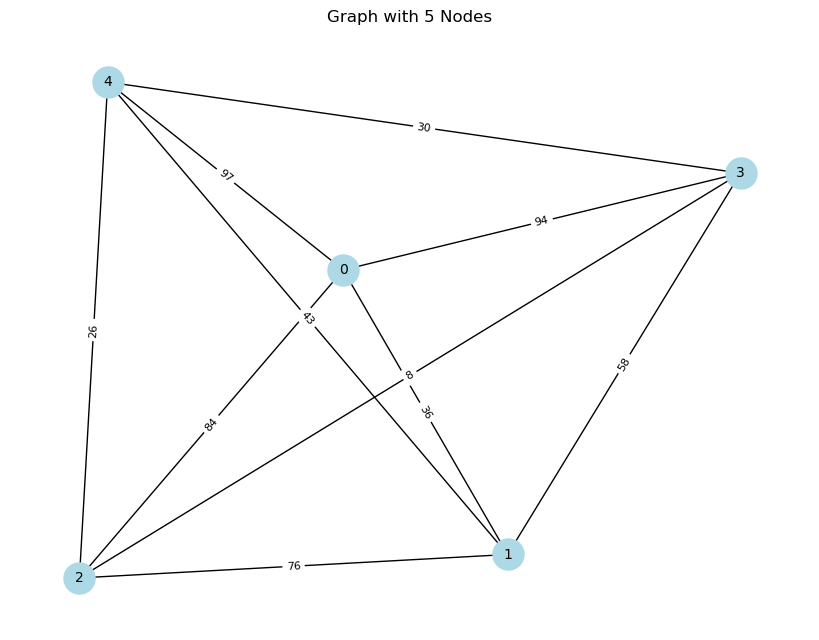

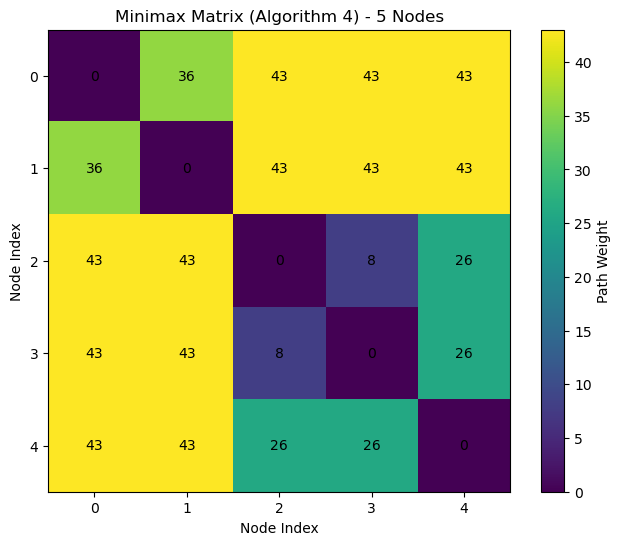

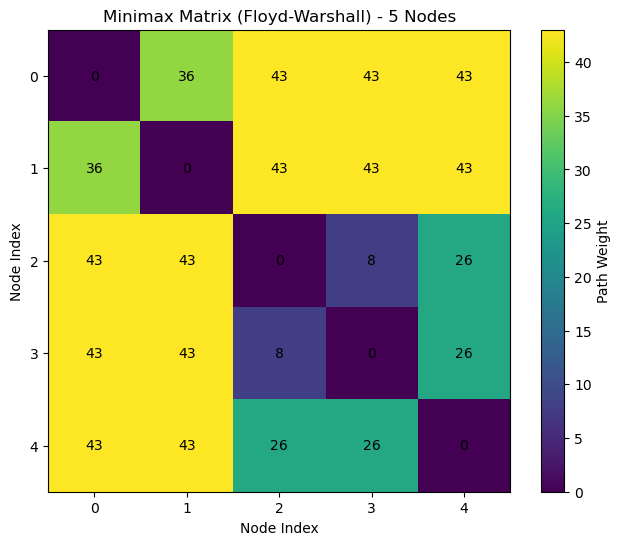

  Correctness: Pass
  Execution Time (seconds) - Algorithm 4: 0.0001, Floyd-Warshall: 0.0000

Testing with graph size: 10


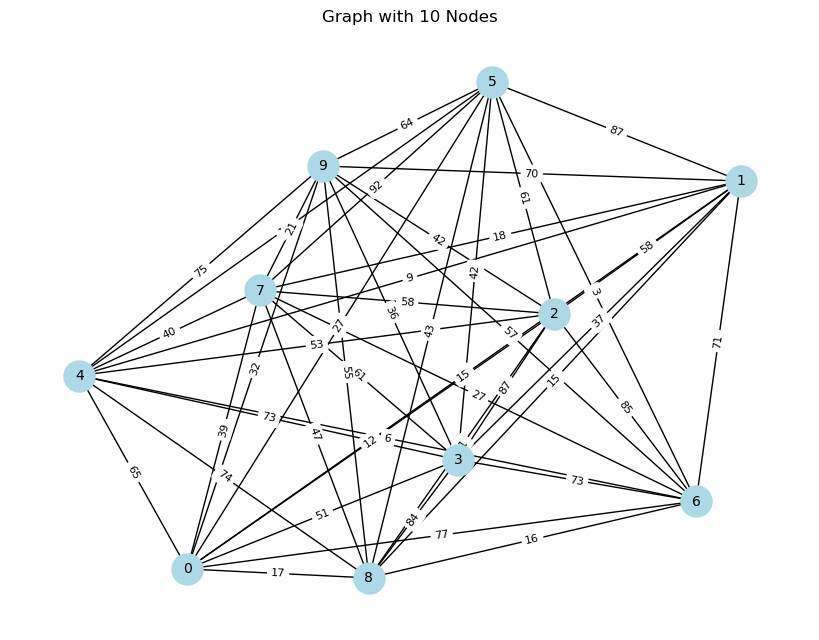

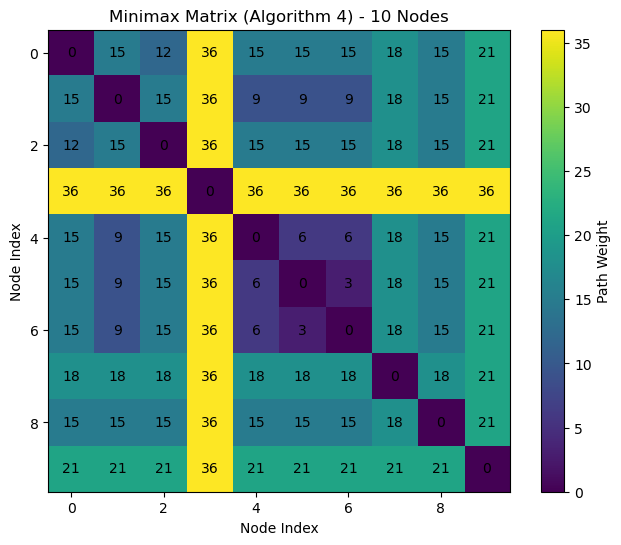

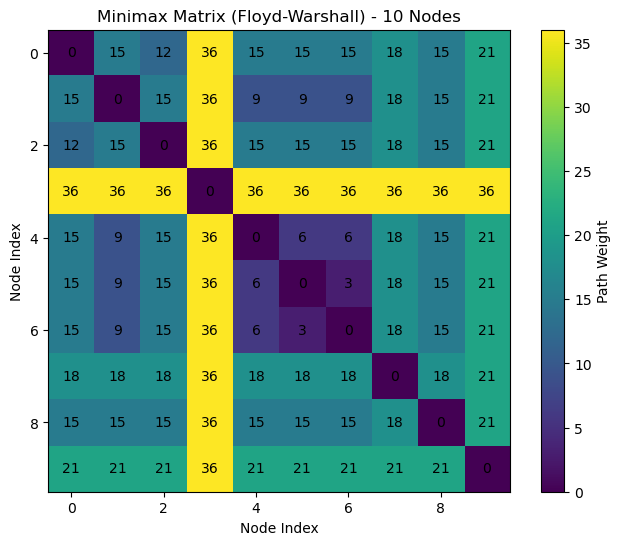

  Correctness: Pass
  Execution Time (seconds) - Algorithm 4: 0.0002, Floyd-Warshall: 0.0004


In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
import networkx as nx

# Utility function to create random adjacency matrices for undirected weighted graphs
def generate_random_graph(num_nodes, max_weight=100):
    adj_matrix = np.random.randint(1, max_weight + 1, size=(num_nodes, num_nodes))
    adj_matrix = np.triu(adj_matrix, 1)  # Keep only upper triangle
    adj_matrix += adj_matrix.T  # Make it symmetric for undirected graphs
    return adj_matrix

# Visualize the input graph
def visualize_graph(adj_matrix, title="Graph Visualization"):
    G = nx.Graph()
    N = len(adj_matrix)
    
    # Add edges with weights
    for i in range(N):
        for j in range(i + 1, N):
            if adj_matrix[i, j] > 0:
                G.add_edge(i, j, weight=adj_matrix[i, j])

    pos = nx.spring_layout(G, seed=42)  # Layout for consistent visualization
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.title(title)
    plt.show()

# Visualize the minimax path matrix
def visualize_matrix(matrix, title="Matrix Visualization"):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', interpolation='none')
    plt.colorbar(label="Path Weight")
    plt.title(title)
    plt.xlabel("Node Index")
    plt.ylabel("Node Index")
    
    # Annotate matrix values
    for (i, j), val in np.ndenumerate(matrix):
        plt.text(j, i, f'{val:.0f}', ha='center', va='center', color='black')
    
    plt.show()

# Run tests with visualization
def run_tests_with_visualization():
    test_sizes = [5, 10]  # Test smaller sizes for visualization clarity
    for size in test_sizes:
        print(f"\nTesting with graph size: {size}")
        
        # Generate random graph
        adj_matrix = generate_random_graph(size)
        visualize_graph(adj_matrix, title=f"Graph with {size} Nodes")

        # Calculate results using both algorithms
        algo4_result = cal_all_pairs_minimax_path_matrix_by_algo_4(adj_matrix)
        fw_result = variant_of_Floyd_Warshall(adj_matrix)

        # Visualize the results
        visualize_matrix(algo4_result, title=f"Minimax Matrix (Algorithm 4) - {size} Nodes")
        visualize_matrix(fw_result, title=f"Minimax Matrix (Floyd-Warshall) - {size} Nodes")

        # Check correctness
        correct = np.allclose(algo4_result, fw_result)
        print(f"  Correctness: {'Pass' if correct else 'Fail'}")

        # Measure execution time
        algo4_time, fw_time = measure_execution_time(adj_matrix)
        print(f"  Execution Time (seconds) - Algorithm 4: {algo4_time:.4f}, Floyd-Warshall: {fw_time:.4f}")

# Run and visualize test cases
run_tests_with_visualization()
